In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree

In [2]:
dfRank = pd.read_csv('https://raw.githubusercontent.com/oca510/ds320FinalProject/main/datasets/cwurData.csv')
dfInfo = pd.read_csv('https://raw.githubusercontent.com/oca510/ds320FinalProject/main/datasets/world-universities.csv')
# external data: demographic statistics
dfDemo = pd.read_csv('https://raw.githubusercontent.com/oca510/ds320FinalProject/main/datasets/acs2017_county_data.csv')
dfEdu = pd.read_csv('https://raw.githubusercontent.com/oca510/ds320FinalProject/main/datasets/education.csv')

In [3]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [4]:
dfRank

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,996,University of the Algarve,Portugal,7,367,567,218,926,845,812,969.0,816,44.03,2015
2196,997,Alexandria University,Egypt,4,236,566,218,997,908,645,981.0,871,44.03,2015
2197,998,Federal University of Ceará,Brazil,18,367,549,218,830,823,812,975.0,824,44.03,2015
2198,999,University of A Coruña,Spain,40,367,567,218,886,974,812,975.0,651,44.02,2015


In [5]:
dfInfo

,X,Y,OBJECTID,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMP,SHELTER_ID
0,-8.765605e+06,5.318192e+06,1,189556,BRYANT & STRATTON COLLEGE-AMHERST,3650 MILLERSPORT HIGHWAY,GETZVILLE,NY,14068,NOT AVAILABLE,...,NOT AVAILABLE,6,1,141,176,317,2,-999,79,NOT AVAILABLE
1,-8.231383e+06,4.975222e+06,2,190682,CUNY SCHOOL OF LAW,2 COURT SQUARE,LONG ISLAND CITY,NY,11101,NOT AVAILABLE,...,LAW SCHOOL | CUNY LAW SCHOOL,18,1,165,418,583,2,-999,201,NOT AVAILABLE
2,-8.247285e+06,5.032103e+06,3,195058,ROCKLAND COMMUNITY COLLEGE,145 COLLEGE RD,SUFFERN,NY,10901,3699,...,NOT AVAILABLE,3,3,3317,3542,6859,2,-999,901,NOT AVAILABLE
3,-8.208890e+06,5.008471e+06,4,193122,SOUTHERN WESTCHESTER BOCES-PRACTICAL NURSING P...,450 MAMARONECK AVENUE,HARRISON,NY,10528,NOT AVAILABLE,...,NOT AVAILABLE,-2,1,54,52,106,2,-999,31,NOT AVAILABLE
4,-8.969252e+06,4.965197e+06,5,204884,OHIO VALLEY COLLEGE OF TECHNOLOGY,15258 STATE ROUTE 170,EAST LIVERPOOL,OH,43920,9585,...,NOT AVAILABLE,1,1,25,176,201,2,-999,30,NOT AVAILABLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6852,-1.009017e+07,4.687538e+06,6853,262031,ST CHARLES COMMUNITY COLLEGE,4601 MID RIVERS MALL DR,COTTLEVILLE,MO,63376,0975,...,SCC,3,3,3102,3167,6269,2,-999,836,NOT AVAILABLE
6853,-8.319680e+06,4.906794e+06,6854,186283,RIDER UNIVERSITY,2083 LAWRENCE ROAD,LAWRENCEVILLE,NJ,8648,3099,...,NOT AVAILABLE,14,2,986,3838,4824,1,2716,1213,NOT AVAILABLE
6854,-8.324179e+06,4.905072e+06,6855,187134,THE COLLEGE OF NEW JERSEY,2000 PENNINGTON ROAD,EWING,NJ,8628,7718,...,TCNJ,14,3,693,6993,7686,1,3994,1631,NOT AVAILABLE
6855,-9.284880e+06,5.219144e+06,6856,170806,MADONNA UNIVERSITY,36600 SCHOOLCRAFT RD,LIVONIA,MI,48150,1176,...,NOT AVAILABLE,9,2,1499,1545,3044,1,400,612,NOT AVAILABLE


In [6]:
dfDemo

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja Municipio,54754,26269,28485,96.7,3.1,0.1,0.0,...,1.4,0.6,0.9,31.6,14234,76.2,19.3,4.3,0.2,16.8
3216,72147,Puerto Rico,Vieques Municipio,8931,4351,4580,95.7,4.0,0.0,0.0,...,5.0,0.0,1.7,14.9,2927,40.7,40.9,18.4,0.0,12.8
3217,72149,Puerto Rico,Villalba Municipio,23659,11510,12149,99.7,0.2,0.1,0.0,...,2.1,0.0,2.8,28.4,6873,59.2,30.2,10.4,0.2,24.8
3218,72151,Puerto Rico,Yabucoa Municipio,35025,16984,18041,99.9,0.1,0.0,0.0,...,1.4,1.8,0.1,30.5,7878,62.7,30.9,6.3,0.0,25.4


In [7]:
dfEdu

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,0,US,United States,NaN,NaN,NaN,NaN,"52,373,312","34,158,051","11,650,730",...,27.4,24.4,"26,472,261","59,472,748","63,756,905","70,920,162",12.0,27.0,28.9,32.1
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,"1,062,306","468,269","136,287",...,25.9,19.0,"458,922","1,022,839","993,344","845,772",13.8,30.8,29.9,25.5
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,"6,611","3,757",933,...,26.9,18.0,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,"18,726","8,426","2,334",...,29.3,23.1,"13,893","41,797","47,274","48,148",9.2,27.7,31.3,31.9
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,"8,120","2,242",581,...,21.3,10.9,"4,812","6,396","4,676","2,080",26.8,35.6,26.0,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3278,72145,PR,Vega Baja Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,21.4,14.4,"10,494","9,681","8,905","7,834",28.4,26.2,24.1,21.2
3279,72147,PR,Vieques Municipio,7.0,12.0,7.0,12.0,NaN,NaN,NaN,...,13.7,10.1,"1,792","2,440",875,"1,121",28.8,39.2,14.0,18.0
3280,72149,PR,Villalba Municipio,2.0,2.0,2.0,2.0,NaN,NaN,NaN,...,18.0,12.8,"3,330","5,809","2,987","3,015",22.0,38.4,19.7,19.9
3281,72151,PR,Yabucoa Municipio,1.0,1.0,1.0,1.0,NaN,NaN,NaN,...,18.3,12.1,"6,927","6,132","6,494","4,293",29.0,25.7,27.2,18.0


**Data process**

data cleaning

In [8]:
# univeristy name, county tolower
dfInfo['NAME'] = dfInfo['NAME'].str.lower()
dfRank['institution'] = dfRank['institution'].str.lower()
dfInfo['COUNTY'] = dfInfo['COUNTY'].str.lower()
dfDemo['County'] = dfDemo['County'].str.replace(' County', '')
dfDemo['County'] = dfDemo['County'].str.lower()


# only use latest rank
dfRank = dfRank[dfRank.year == 2015]

# only need us university data
dfRank = dfRank[dfRank.country == "USA"]

# state name to state abbreviation
dfDemo['State'] = dfDemo['State'].map(us_state_to_abbrev).fillna(dfDemo['State'])

In [9]:
dfRank.shape

(229, 14)

###Data integration

In [10]:
# join rank data with university info we need
dfRank2 = dfRank.merge(dfInfo, left_on='institution', right_on='NAME')
dfRank2.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year', 'X', 'Y', 'OBJECTID', 'IPEDSID', 'NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS',
       'POPULATION', 'COUNTY', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE',
       'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR',
       'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID',
       'ALIAS', 'SIZE_SET', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL',
       'TOT_ENROLL', 'HOUSING', 'DORM_CAP', 'TOT_EMP', 'SHELTER_ID'],
      dtype='object')

In [11]:
# join demographic data with education data
dfDemo2 = dfDemo.merge(dfEdu, left_on='CountyId', right_on='FIPS Code')
dfDemo2.head()

,CountyId,State_x,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1001,AL,autauga,55036,26899,28137,2.7,75.4,18.9,0.3,...,26.9,18.0,"4,291","12,551","10,596","9,929",11.5,33.6,28.4,26.6
1,1003,AL,baldwin,203360,99527,103833,4.4,83.1,9.5,0.8,...,29.3,23.1,"13,893","41,797","47,274","48,148",9.2,27.7,31.3,31.9
2,1005,AL,barbour,26201,13976,12225,4.2,45.7,47.8,0.2,...,21.3,10.9,"4,812","6,396","4,676","2,080",26.8,35.6,26.0,11.6
3,1007,AL,bibb,22580,12251,10329,2.4,74.6,22.0,0.4,...,20.4,7.1,"3,386","7,256","3,848","1,678",20.9,44.9,23.8,10.4
4,1009,AL,blount,57667,28490,29177,9.0,87.4,1.5,0.3,...,24.8,9.6,"7,763","13,299","13,519","5,210",19.5,33.4,34.0,13.1


In [12]:
# merge university info with demographic info
dfFinal = dfRank2.merge(dfDemo2, left_on=['COUNTY','STATE'], right_on=['County', 'State_x'])

In [13]:
dfFinal.shape

(125, 143)

In [14]:
dfFinal= dfFinal.sort_values(by=['world_rank'])

In [15]:
dfFinal

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,1,harvard university,USA,1,1,1,1,1,1,1,...,21.5,43.6,"73,690","213,958","203,445","632,232",6.6,19.0,18.1,56.3
5,2,stanford university,USA,2,9,2,4,5,3,3,...,27.0,40.5,"155,203","188,180","292,055","699,520",11.6,14.1,21.9,52.4
1,3,massachusetts institute of technology,USA,3,3,11,2,15,2,2,...,21.5,43.6,"73,690","213,958","203,445","632,232",6.6,19.0,18.1,56.3
6,8,university of chicago,USA,6,11,14,8,17,16,12,...,25.5,28.0,"461,880","829,451","903,730","1,392,515",12.9,23.1,25.2,38.8
12,9,princeton university,USA,7,4,15,3,72,25,24,...,22.3,34.0,"28,459","60,780","52,828","105,467",11.5,24.6,21.3,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,856,florida atlantic university,USA,221,367,567,218,855,741,812,...,29.0,27.7,"123,394","257,316","297,944","393,340",11.5,24.0,27.8,36.7
121,897,university of north carolina at greensboro,USA,224,367,567,218,899,825,645,...,27.5,30.3,"38,516","81,878","104,820","126,827",10.9,23.3,29.8,36.0
122,901,university of southern mississippi,USA,225,367,567,218,913,853,812,...,28.6,22.8,"5,912","12,750","15,159","13,001",12.6,27.2,32.4,27.8
123,906,oakland university,USA,226,367,567,218,888,810,812,...,29.0,38.2,"51,745","164,499","250,274","417,746",5.9,18.6,28.3,47.2


### Machine Learning 
Feature selection

In [16]:
print([x for x in dfFinal.columns])

['world_rank', 'institution', 'country', 'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score', 'year', 'X', 'Y', 'OBJECTID', 'IPEDSID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'COUNTYFIPS', 'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC', 'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STFIPS', 'COFIPS', 'SECTOR', 'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS', 'SIZE_SET', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'HOUSING', 'DORM_CAP', 'TOT_EMP', 'SHELTER_ID', 'CountyId', 'State_x', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Producti

In [17]:
# All factors(demographic info)
dfML = dfFinal[['world_rank', 'institution', 'STATE', 'COUNTY',
               'national_rank', 'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 'score',
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"]
              ]
dfML.shape

(125, 34)

In [18]:
# put world_rank in buckets
dfML2 = dfML.copy()
for x in dfML2.world_rank:
    if x <= 200:
        dfML2.loc[dfML2['world_rank'] == x, ['world_rank']] = "1"
    else: dfML2.loc[dfML2['world_rank'] == x, ['world_rank']] = "0"
dfML2

,world_rank,institution,STATE,COUNTY,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,"Percent of adults with a bachelor's degree or higher, 2015-19"
0,1,harvard university,MA,middlesex,1,1,1,1,1,1,...,2.4,5.6,30.3,862873,82.9,10.7,6.2,0.1,4.8,56.3
5,1,stanford university,CA,santa clara,2,9,2,4,5,3,...,3.1,4.8,28.0,967294,84.7,9.3,5.9,0.1,5.7,52.4
1,1,massachusetts institute of technology,MA,middlesex,3,3,11,2,15,2,...,2.4,5.6,30.3,862873,82.9,10.7,6.2,0.1,4.8,56.3
6,1,university of chicago,IL,cook,6,11,14,8,17,16,...,2.4,4.5,32.9,2521437,84.2,11.1,4.6,0.1,8.7,38.8
12,1,princeton university,NJ,mercer,7,4,15,3,72,25,...,1.9,5.0,28.3,181602,80.0,16.0,3.9,0.1,7.5,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,0,florida atlantic university,FL,palm beach,221,367,567,218,855,741,...,2.0,6.4,25.3,655496,83.1,10.0,6.7,0.1,7.4,36.7
121,0,university of north carolina at greensboro,NC,guilford,224,367,567,218,899,825,...,1.0,5.5,21.5,246145,82.3,12.2,5.4,0.1,6.6,36.0
122,0,university of southern mississippi,MS,forrest,225,367,567,218,913,853,...,8.3,1.2,21.6,32089,77.9,18.8,3.2,0.0,11.9,27.8
123,0,oakland university,MI,oakland,226,367,567,218,888,810,...,0.8,4.5,26.7,629551,86.8,8.2,4.8,0.2,5.3,47.2


In [19]:
# internal features 8 features
dfInternal = dfML2[['world_rank',
               'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents'
               ]
              ]
dfInternal.shape

(125, 9)

In [20]:
# external features 20 features
dfExternal = dfML2[['world_rank',
                'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]
              ]
dfExternal.shape

(125, 21)

In [21]:
# mixed features 29 features
dfMixed = dfFinal[['world_rank',
               'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"]
              ]
dfMixed.shape

(125, 29)

### **Internal factor**

In [22]:
internal_train, internal_test = np.split(dfInternal.sample(frac=1, random_state=42), 
                       [int(.8*len(dfInternal))])

##### Decision Tree

In [23]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(dfInternal[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']],
                dfML2["world_rank"])

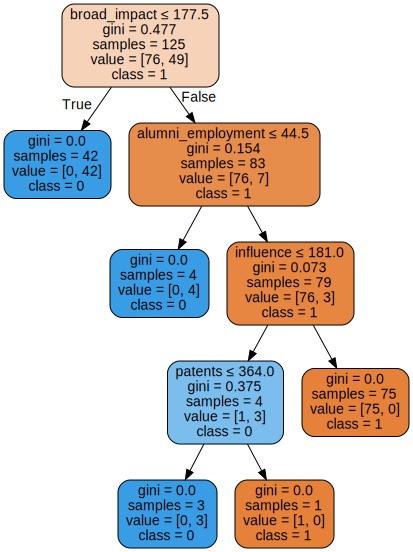

In [24]:
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents'],  
                      class_names=["1", "0"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

#### logistic regression

In [25]:
LG_model_internal = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', LogisticRegression())
])   
LG_model_internal.fit(internal_train[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']]
                      , internal_train["world_rank"]);

In [26]:
LG_model_internal.named_steps['model'].coef_

array([[-0.18246681, -0.71542298, -0.61651089, -0.92469797, -0.68283153,
        -0.89809687, -0.82339552, -0.61868318]])

#### random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
RF_model_internal = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', RandomForestClassifier())
])
RF_model_internal.fit(internal_train[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']]
                      , internal_train["world_rank"]);

#### knn

In [28]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model_internal = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', KNeighborsClassifier())
])
KNN_model_internal.fit(internal_train[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']]
                      , internal_train["world_rank"]);

#### Accuracy

In [29]:
def compute_accuracy(model, data, group):
    if group == 'internal':
        y_hat_class = model.predict(data[['quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents']])
    elif  group == 'external':
        y_hat_class = model.predict(data[['TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"]])
    else:
        y_hat_class = model.predict(data[[
               'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"]])
    
    y_obs = data["world_rank"]
    return sum(y_hat_class == y_obs) / len(y_hat_class)

In [30]:
def get_train_and_validation_accuracy(model, group):
    if group == 'internal':
        train_accuracy = compute_accuracy(model, internal_train, group)
        test_accuracy = compute_accuracy(model, internal_test, group)
        
    return train_accuracy, test_accuracy

In [31]:
# training accuracy of logistic regression
LG_model_internal_accuracy = get_train_and_validation_accuracy(LG_model_internal, 'internal')
LG_model_internal_accuracy

(0.94, 0.96)

In [32]:
# training accuracy of Random forests
RF_model_internal_accuracy = get_train_and_validation_accuracy(RF_model_internal, 'internal')
RF_model_internal_accuracy

(1.0, 1.0)

In [33]:
# training accuracy of KNN
KNN_model_internal_accuracy = get_train_and_validation_accuracy(RF_model_internal, 'internal')
KNN_model_internal_accuracy

(1.0, 1.0)

## **External factor**

In [34]:
external_train, external_test = np.split(dfExternal.sample(frac=1, random_state=42), 
                       [int(.8*len(dfExternal))])

#### Decision Tree

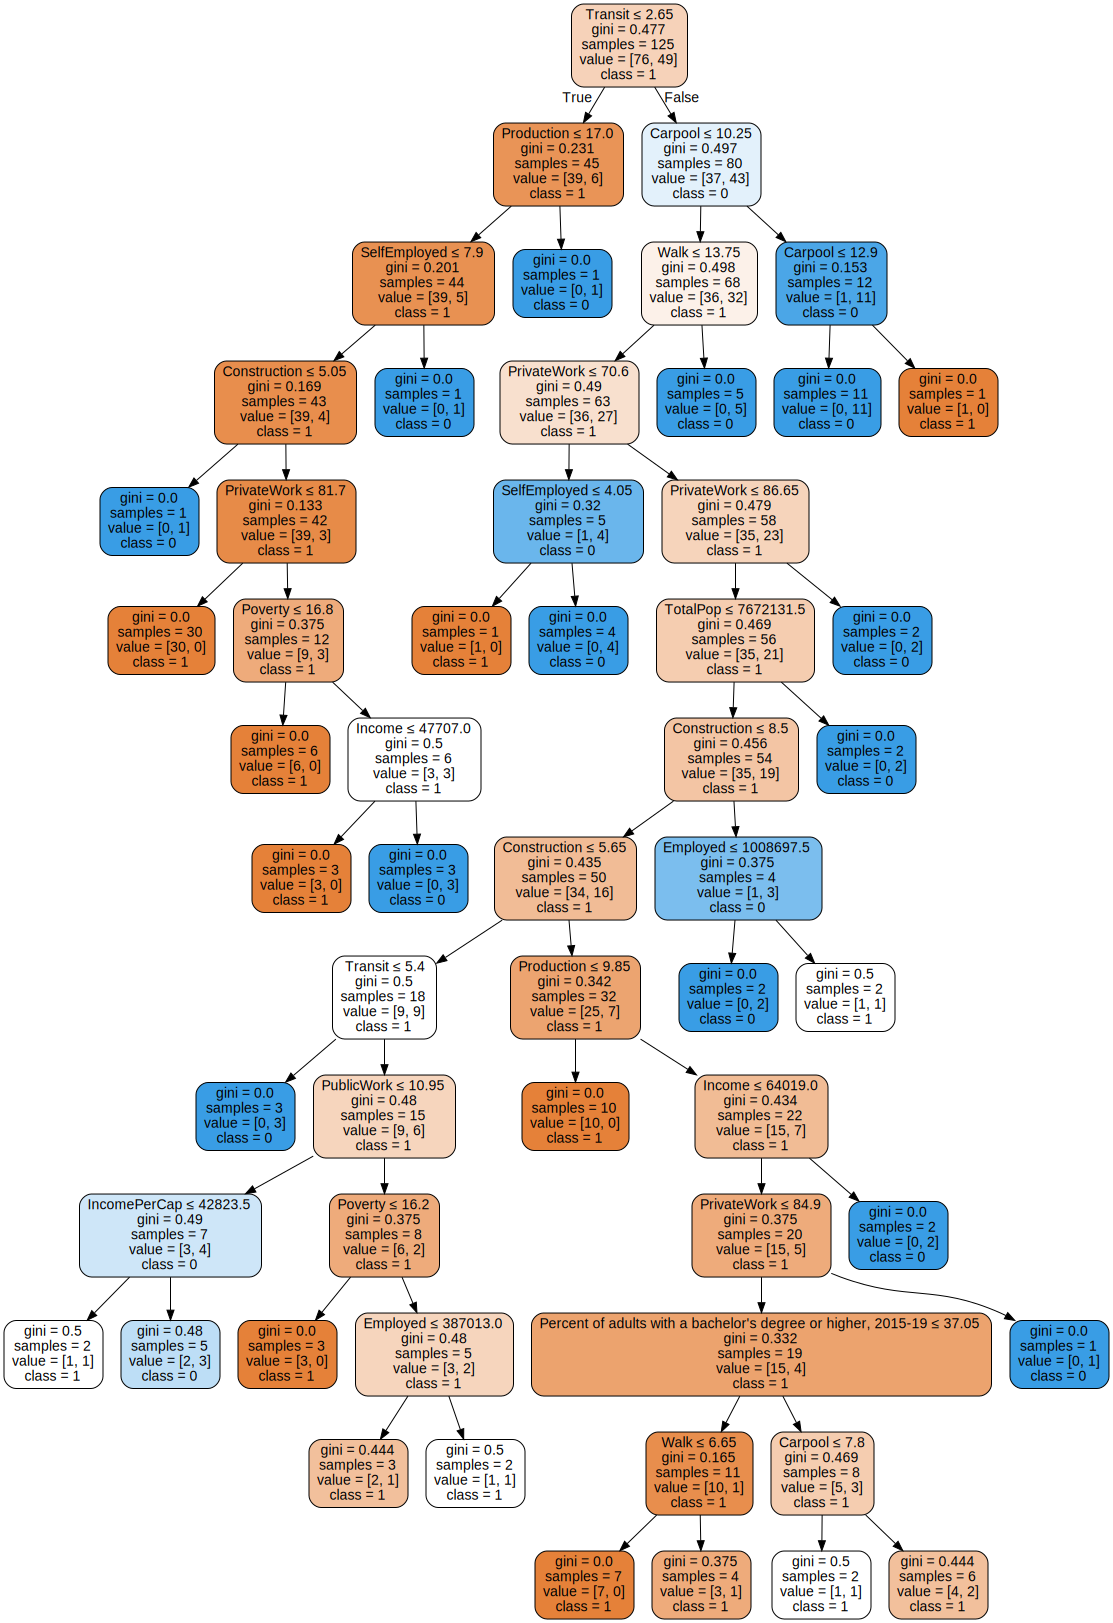

In [35]:
from sklearn import tree
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(dfExternal[[
                'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]],
                dfML2["world_rank"])
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=[
                'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"],  
                      class_names=["1", "0"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

#### logistic regression

In [36]:
LG_model_external = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', LogisticRegression())
])   
LG_model_external.fit(external_train[[
                'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]], external_train["world_rank"]);

In [37]:
LG_model_external.named_steps['model'].coef_

array([[ 0.14310929,  0.01235242,  0.27915237,  0.71410717, -0.3104413 ,
         0.22654748,  0.27358078,  0.24287968, -0.48035282,  0.37086199,
         0.10408387, -0.3886142 ,  0.41583897,  0.10414158,  0.24865083,
        -0.30422775,  0.34647139,  0.29139476, -0.21873683,  0.73082   ]])

#### random forest

In [38]:
RF_model_external = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', RandomForestClassifier())
])
RF_model_external.fit(external_train[[
                'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]], external_train["world_rank"]);

#### knn

In [39]:
KNN_model_external = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', KNeighborsClassifier())
])
KNN_model_external.fit(external_train[[
                'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]],external_train["world_rank"]);

#### Accuracy

In [40]:
def get_train_and_validation_accuracy(model, group):
    if group == 'external':
        train_accuracy = compute_accuracy(model, external_train, group)
        test_accuracy = compute_accuracy(model, external_test, group)
        
    return train_accuracy, test_accuracy

In [41]:
# training accuracy of logistic regression
LG_model_external_accuracy = get_train_and_validation_accuracy(LG_model_external, 'external')
LG_model_external_accuracy

(0.72, 0.72)

In [42]:
# training accuracy of Random forests
RF_model_external_accuracy = get_train_and_validation_accuracy(RF_model_external, 'external')
RF_model_external_accuracy

(0.93, 0.68)

In [43]:
# training accuracy of KNN
KNN_model_external_accuracy = get_train_and_validation_accuracy(RF_model_external, 'external')
KNN_model_external_accuracy

(0.93, 0.68)

## **Mixed factors**

In [44]:
mixed_train, mixed_test = np.split(dfMixed.sample(frac=1, random_state=42), 
                       [int(.8*len(dfMixed))])

#### Decision Tree

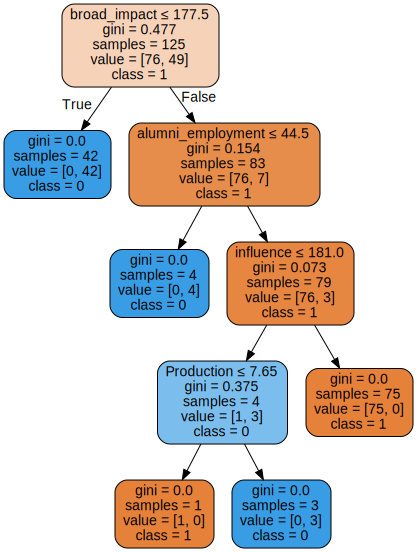

In [45]:
decision_tree_model = tree.DecisionTreeClassifier()
decision_tree_model = decision_tree_model.fit(dfMixed[[
                'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]],
                dfML2["world_rank"])
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                      feature_names=[
               'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"],  
                      class_names=["1", "0"],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)
#graph.render(format="png", filename="iris_tree")
graph

#### logistic regression

In [46]:
LG_model_mixed = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', LogisticRegression())
])   
LG_model_external.fit(mixed_train[[
                'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]], mixed_train["world_rank"]);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


#### Random Forest

In [48]:
RF_model_mixed = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', RandomForestClassifier())
])
RF_model_mixed.fit(mixed_train[[
                'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]], mixed_train["world_rank"]);

#### knn

In [49]:
KNN_model_mixed = Pipeline([        
    ('scale', StandardScaler()),        
    ('model', KNeighborsClassifier())
])
KNN_model_mixed.fit(mixed_train[[
                'quality_of_education', 'alumni_employment', 'quality_of_faculty', 'publications', 'influence', 'citations', 'broad_impact', 'patents', 
               'TotalPop', 'Income', 'IncomePerCap', 'Poverty', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment',
               "Percent of adults with a bachelor's degree or higher, 2015-19"
               ]],mixed_train["world_rank"]);

#### Accuracy

In [50]:
def get_train_and_validation_accuracy(model, group):
    if group == 'mixed':
        train_accuracy = compute_accuracy(model, mixed_train, group)
        test_accuracy = compute_accuracy(model, mixed_test, group)
        
    return train_accuracy, test_accuracy

In [51]:
# training accuracy of logistic regression
LG_model_mixed_accuracy = get_train_and_validation_accuracy(LG_model_mixed, 'mixed')
LG_model_mixed_accuracy

NotFittedError: ignored

In [52]:
# training accuracy of Random forests
RF_model_mixed_accuracy = get_train_and_validation_accuracy(RF_model_mixed, 'mixed')
RF_model_mixed_accuracy

(1.0, 0.0)

In [53]:
# training accuracy of KNN
KNN_model_mixed_accuracy = get_train_and_validation_accuracy(RF_model_mixed, 'mixed')
KNN_model_mixed_accuracy

(1.0, 0.0)